In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random
from math import cos, sin

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.pyplot import figure
import random
import math

In [3]:
# n_in, n_h, n_out, batch_size = 10, 5, 1, 10


In [4]:
def train(x,y,model,crit):
    for epoch in range(1000):
        y_pred = model(x)

        #get loss
        loss = crit(y_pred,y)
#         print('epoch: ', epoch,' loss: ', loss.item())

        #zero grad
        optimizer.zero_grad()

        #back pass
        loss.backward()
        #update params
        optimizer.step()
    return loss



In [5]:
def pred(model,x):
    return model(torch.FloatTensor(x)).tolist()



def rand_points():
    x_points = np.linspace(0,10,200)
    y_points = np.linspace(0,10,200)
    points = [[x,y] for x in x_points for y in y_points]
    return points

def train_vals(x):
    return ([z[0] for z in x.tolist()],[z[1] for z in x.tolist()])



def plot_regions(x,y,model):
    x_train,y_train = train_vals(x)
    points = rand_points()
    x_map = [x[0] for x in points]
    y_map = [x[1] for x in points]
    preds = pred(model,points)
    
    
    #get colors
    c1 = ['g','b']
    c2 = ['#E2E79F','#FF90FF']
    
    train_map = [c1[int(x[0])] for x in y.tolist()]
    cmap = [c2[0] if x[0] < 0.5 else c2[1] for x in preds]
    #plot points
    plt.scatter(x_map,y_map,color=cmap)
    plt.scatter(x_train,y_train,color=train_map,marker='o')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    #show classification regions
    plt.show()
    
    

    
    

Underparameterize


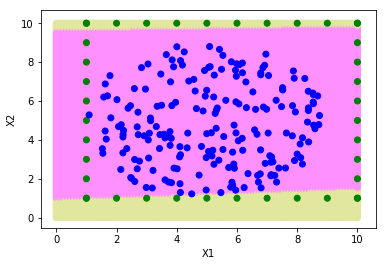

Overparameterize


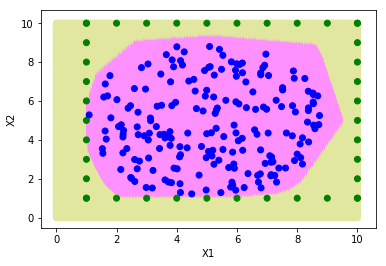

In [6]:
d = 2


#get data for new model
x1 = []
for z in range(1,11):
    x1.append([z,1])
    x1.append((1,z))
    x1.append((10,z))
    x1.append((z,10))
y1 = [[0] for x in range(len(x1))]
x2 = []
y2 = []
for z in range(200):
    r = 4 * (random.random() ** 0.5)
    theta = random.random() * 2 * 3.14159
    x = 5 + r * cos(theta)
    y = 5 + r * sin(theta)
    x2.append([x,y])
    y2.append([1])

x = x1 + x2
y = y1 + y2





x = torch.FloatTensor(x)
y = torch.FloatTensor(y)



print("Underparameterize")
H = 3
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)



print("Overparameterize")
H = 20
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)
    

Underparameterize


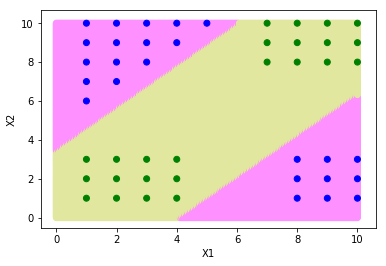

Overparameterize


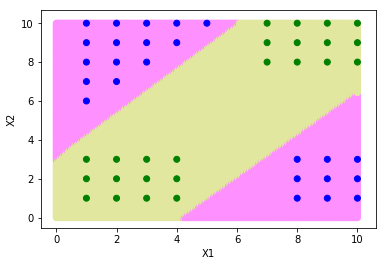

In [7]:

def load_data(file):
    x = []
    y = []
    with open(file) as f:
        for l in f:
            vals = [int(x) for x in l.split()]
            if vals == []:
                break
            x.append([vals[0],vals[1]])
            if vals[2] == 0 or vals[2] == 3:
                y.append([0])
            else:
                y.append([1])
    return x,y

x,y = load_data('data0.txt')
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

H = 3
print("Underparameterize")
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)
plot_regions(x,y,model)
    

H = 10
print("Overparameterize")

model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)
plot_regions(x,y,model)
    

In [8]:
#how many different local optima are found?
#local optima are diff if different classification
# of training data
# decision boundry will be different every time, so it
# is not a  good measure

#also figure out how the weights are spread out
#visualize weights in relation to each other

#4 syntehtic data sets


#NN spread out weights

#look at SGD vs Adam



In [9]:
def gen_circle(n, x, y, radius, disk_start=0, circ_start=0, circ_end=1, noise=False):
    """
    Generates points in within a specific disk.
    
    Args:
        - n: Number of points to generate
        - x: X-axis center of circle
        - y: Y-axis center of circle
        - radius:     Radius of circle
        - disk_start: [0, 1] where to start center of circle
        - circ_start: [0, 1] Start place of circle (Defaults 0 == 3PM).
        - circ_end:   [0, 1] End place of circle (Defaults 1 == 3PM, wraps around counter clockwise).
        - noise:      Add standard normal noise to data points
    """
    data = []
    for i in range(n):
        arc = random.uniform(circ_start, circ_end) * 2 * math.pi
        r = radius * np.sqrt(random.uniform(disk_start, 1))
        
        p_x = r * np.cos(arc) + x
        p_y = r * np.sin(arc) + y
        
        if noise:
            p_x += np.random.normal(0,1)
            p_y += np.random.normal(0,1)
            
        data.append([p_x, p_y])
    return data

In [10]:
def plot(data1, data2):
    data1 = np.array(data1)
    data2 = np.array(data2)
    figure(num=None, figsize=(6, 6), dpi=120, facecolor='w', edgecolor='k')
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, aspect='equal')



    axis = { 'xmin' : -10, 
             'xmax' : 10, 
             'ymin' : -10, 
             'ymax' : 10 }

    #ax2.add_artist(Circle((x, y), r, color=(1,0,0,.7)))
    plt.axis(**axis)
    plt.scatter(data1[:, 0], data1[:, 1])
    plt.scatter(data2[:, 0], data2[:, 1])
    plt.show()

In [11]:
def show_weights(model):
    weights1 = np.array(model[0].weight.tolist())
    bias = np.array(model[0].bias.tolist())
    
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

    plt.scatter(weights1[:,0], weights1[:,1], s=300, color='salmon', edgecolor='black', linewidths=2)

    m = np.max(np.abs(weights1))
    pad = .1 * m
    plt.xlim(-m - pad, m + pad)
    plt.ylim(-m - pad, m + pad)
    plt.title('Counts of Feature Variable Types')
    plt.xlabel('w1')
    plt.ylabel('w2')

    #plt.savefig('Var-Type-Bar.png')

    plt.show()
    
    
def test_set():
    x_points = np.linspace(0,10,200)
    y_points = np.linspace(0,10,200)
    points = [[x,y] for x in x_points for y in y_points]
    return points


## Data set 1

<Figure size 720x720 with 0 Axes>

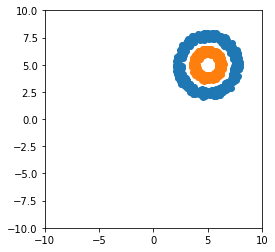

700
700


In [12]:
n = 250
r = 3
x = 5
y = 5

data1 = gen_circle(350, x, y, r, disk_start = .6, circ_start = 0 , circ_end = 1)
data2 = gen_circle(350, x, y, 1.5, disk_start = .4, circ_start = 0 , circ_end = 1)

plot(data1, data2)

x = torch.FloatTensor(data1 + data2)
y = ([[0]] * len(data1)) + ([[1]] * len(data2))
y = torch.FloatTensor(y)
print(len(x))
print(len(y))

The loss is 0.028160767629742622


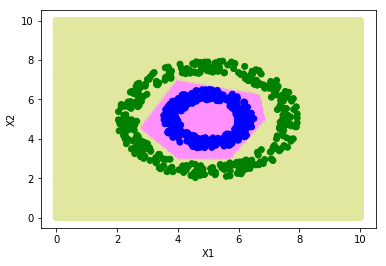

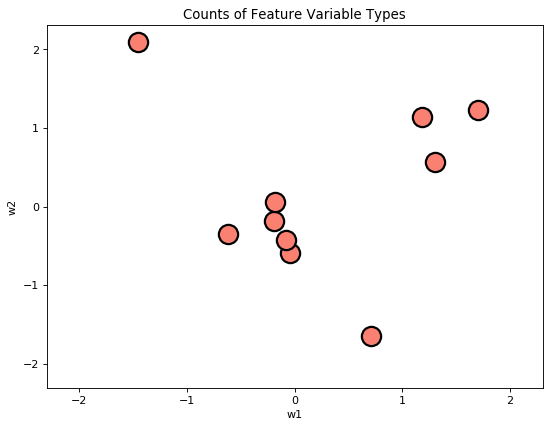

The loss is 0.010450469329953194


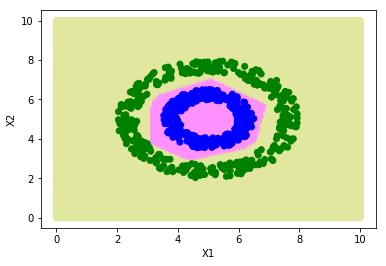

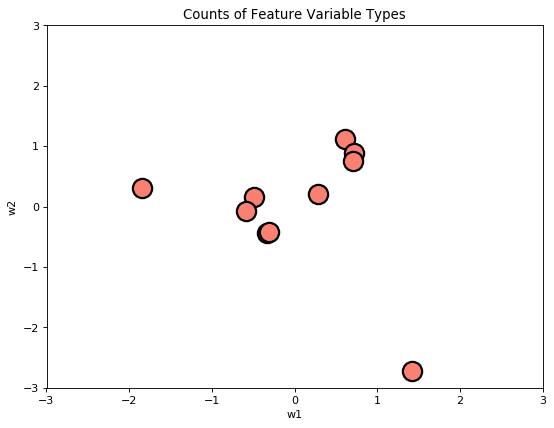

The loss is 0.22277666628360748


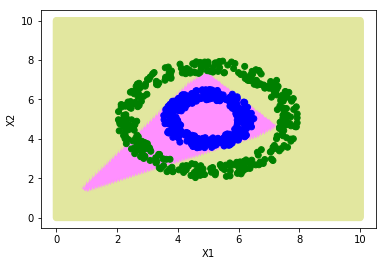

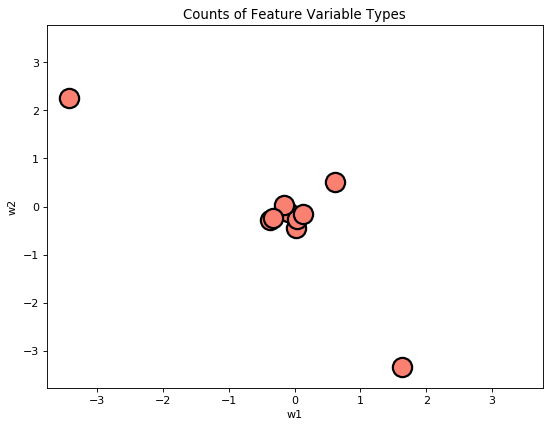

In [13]:
for ind in range(3):

    H = 10
    model = nn.Sequential(nn.Linear(d,H),
                         nn.ReLU(),
                         nn.Linear(H,1),
                          nn.Sigmoid())

    crit = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    loss = train(x,y,model,crit)
    print("The loss is " + str(loss.tolist()))
    
    plot_regions(x,y,model)
    show_weights(model)

## Data set 2

<Figure size 720x720 with 0 Axes>

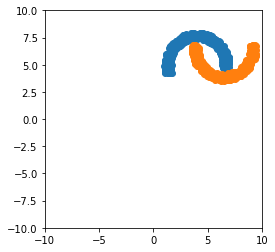

800
800


In [14]:
n = 250
r = 3
x = 5
y = 5

data5 = gen_circle(400, x - 1, y, r, disk_start = .6, circ_start = -.02 , circ_end = .55)
data6 = gen_circle(400, x + 1.5, y + 1.5, r, disk_start = .6, circ_start = .48 , circ_end = 1.02)

plot(data5, data6)

x = torch.FloatTensor(data5 + data6)
y = ([[0]] * len(data5)) + ([[1]] * len(data6))
y = torch.FloatTensor(y)
print(len(x))
print(len(y))

The loss is 0.009715043939650059


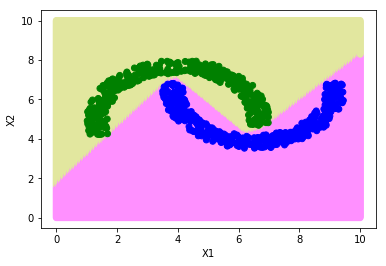

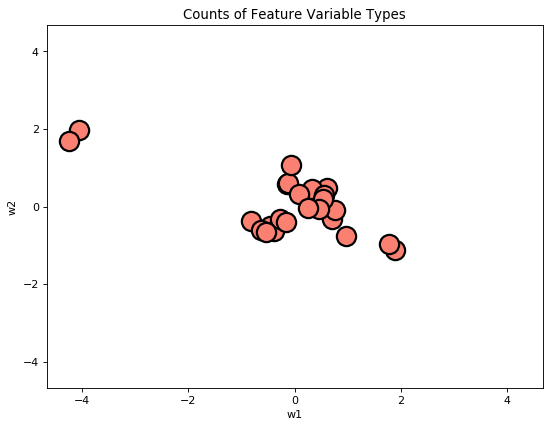

The loss is 0.02304597571492195


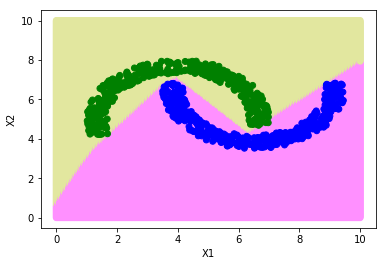

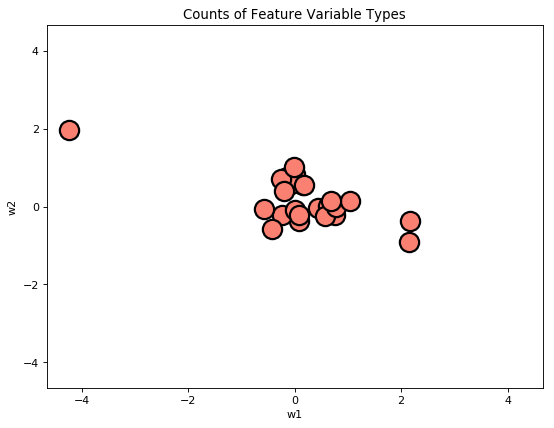

The loss is 0.3408990204334259


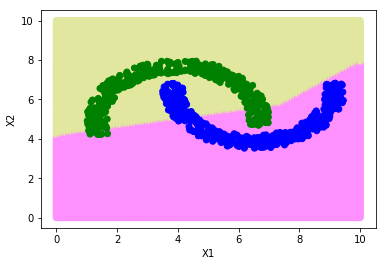

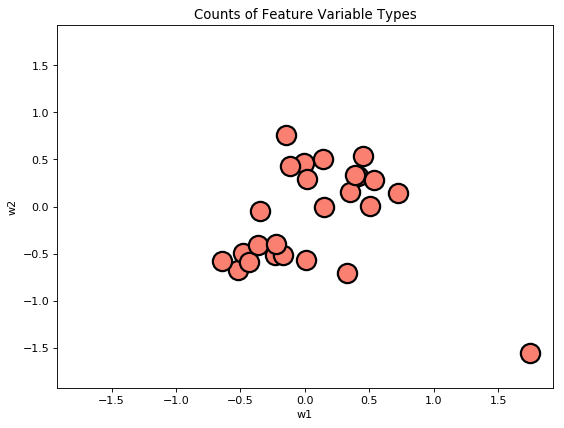

In [15]:
for ind in range(3):

    H = 25
    model = nn.Sequential(nn.Linear(d,H),
                         nn.ReLU(),
                         nn.Linear(H,1),
                          nn.Sigmoid())

    crit = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    loss = train(x,y,model,crit)
    print("The loss is " + str(loss.tolist()))
    
    plot_regions(x,y,model)
    show_weights(model)

## Data Set 3

The loss is 0.012293021194636822


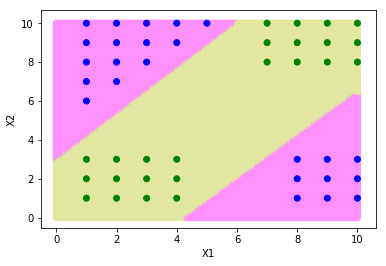

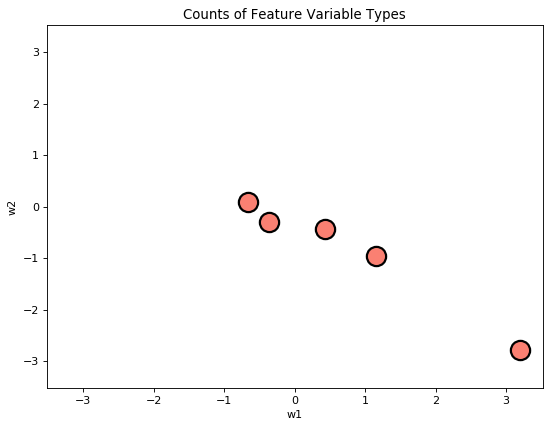

The loss is 0.0028330173809081316


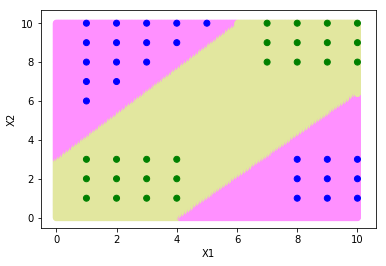

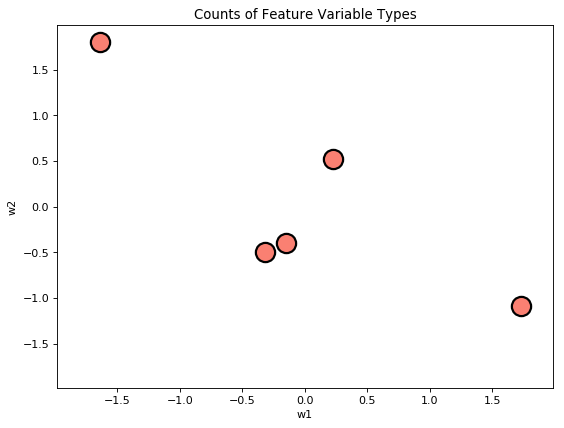

The loss is 0.5415217280387878


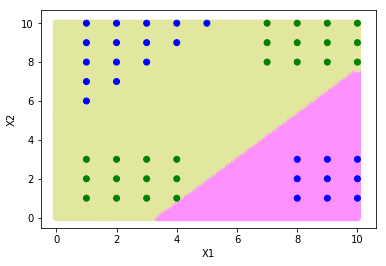

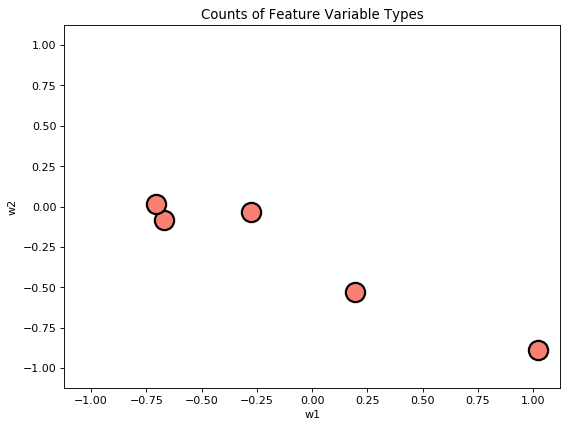

In [16]:

x,y = load_data('data0.txt')
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
for ind in range(3):

    H = 5
    model = nn.Sequential(nn.Linear(d,H),
                         nn.ReLU(),
                         nn.Linear(H,1),
                          nn.Sigmoid())

    crit = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    loss = train(x,y,model,crit)
    print("The loss is " + str(loss.tolist()))
    
    plot_regions(x,y,model)
    show_weights(model)

## Data Set 4

The loss is 0.4517892003059387


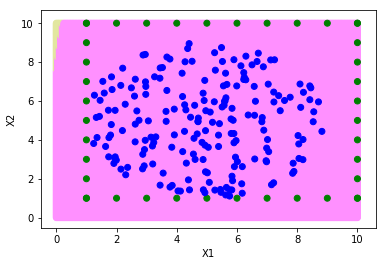

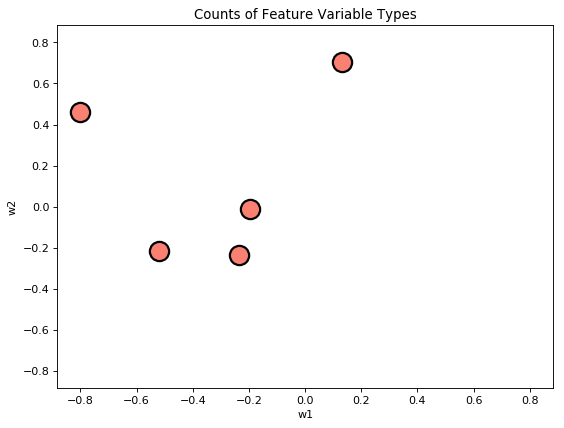

The loss is 0.4440513551235199


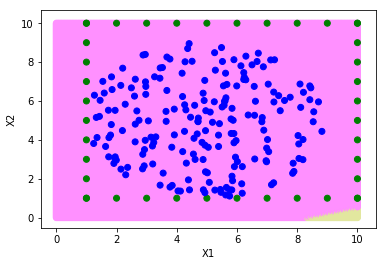

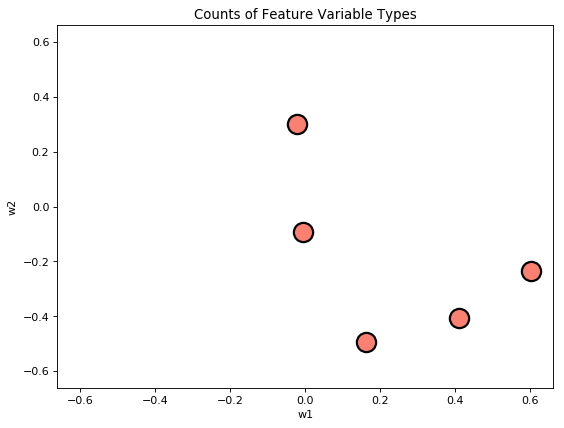

The loss is 0.4404057264328003


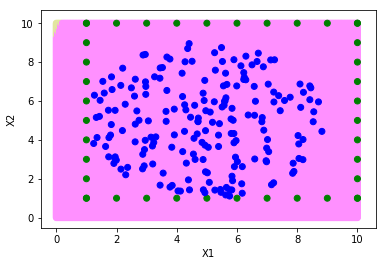

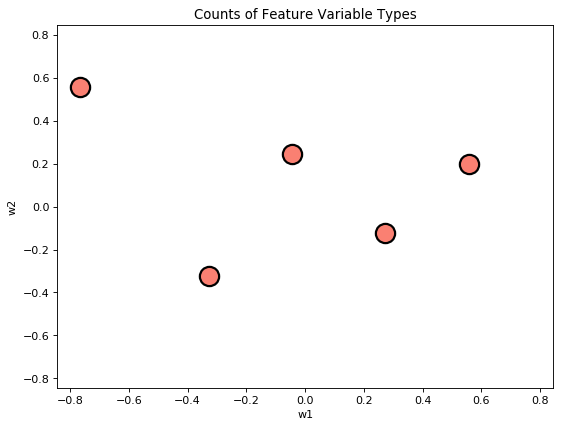

In [17]:
#get data for new model
x1 = []
for z in range(1,11):
    x1.append([z,1])
    x1.append((1,z))
    x1.append((10,z))
    x1.append((z,10))
y1 = [[0] for x in range(len(x1))]
x2 = []
y2 = []
for z in range(200):
    r = 4 * (random.random() ** 0.5)
    theta = random.random() * 2 * 3.14159
    x = 5 + r * cos(theta)
    y = 5 + r * sin(theta)
    x2.append([x,y])
    y2.append([1])

x = x1 + x2
y = y1 + y2





x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
for ind in range(3):

    H = 5
    model = nn.Sequential(nn.Linear(d,H),
                         nn.ReLU(),
                         nn.Linear(H,1),
                          nn.Sigmoid())

    crit = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
    loss = train(x,y,model,crit)
    print("The loss is " + str(loss.tolist()))
    
    plot_regions(x,y,model)
    show_weights(model)